### Student Information
Name: 鍾定達

Student ID: 105030008

GitHub ID: Henry-Chung1119

Kaggle name: HenryChung1119

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

## Part1

---
## 1. Data Preparation

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
train_df

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
train_df

,id,text,emotion,intensity
1816,20959,Going to get myself a copy of @StephenKing's C...,fear,0.292
2024,30020,@JoshNoneYaBiz I love parody accounts! Well do...,joy,0.875
403,10403,Now that I have my ex's number now its time to...,anger,0.500
2659,30655,Well look at the bright side. You found a use ...,joy,0.312
2001,21144,@FraserKeegan just had a steak pie supper,fear,0.083
...,...,...,...,...
1550,20693,For the last 2 years the U.S. has been averagi...,fear,0.438
824,10824,630am meeting Olympic House #10golds24 . #rel...,anger,0.208
2105,30101,@D_McMenemy It'll be easy to spot the parade o...,joy,0.750
2361,30357,"Accept the challenges, So that you may feel th...",joy,0.521


In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
count_vect1 = CountVectorizer()
train_text_counts = count_vect1.fit_transform(train_df.text)
train_feature_names = count_vect1.get_feature_names()
# text_counts.toarray()
# feature_names
sumOfTrainText = train_text_counts.toarray().sum(axis=0)
sumOfTrainTextSortByIndex = np.argsort(sumOfTrainText)
sumOfTrainTextSortByIndex[::-1]
# a = 0
# top30_frequency_word = []
top30_frequency_word_train_dataset = []
for i in range(1,30):
    top30_frequency_word_train_dataset.append((train_feature_names[sumOfTrainTextSortByIndex[i]]))
print("Top 30 words in train dataset: ", top30_frequency_word_train_dataset)

print("\n")

count_vect2 = CountVectorizer()
test_text_counts = count_vect2.fit_transform(test_df.text)
test_feature_names = count_vect2.get_feature_names()
# text_counts.toarray()
# feature_names
sumOfTestText = test_text_counts.toarray().sum(axis=0)
sumOfTestTextSortByIndex = np.argsort(sumOfTestText)
sumOfTestTextSortByIndex[::-1]
# a = 0
# top30_frequency_word = []
top30_frequency_word_test_dataset = []
for i in range(1,30):
    top30_frequency_word_test_dataset.append((test_feature_names[sumOfTestTextSortByIndex[i]]))
print("Top 30 words in test dataset: ", top30_frequency_word_test_dataset)

print("\n")

Top 30 words in train dataset:  ['mericanmainer', 'merenthaprophet', 'merely', 'mentions', 'mentioned', 'mentality', 'mensah', 'mensa', 'menforchoice', 'mendes', 'memorable', 'member', 'melting', 'melsey6', 'melissavcomedy', 'melbourne', 'melbjs', 'melanie_pierce', 'mel_harder', 'mehrtarar', 'mehnazt', 'megynkelly', 'meghanemurphy', 'merlin', 'merrier', 'meruna_', 'messages', 'midfielders', 'microsoftsv']


Top 30 words in test dataset:  ['mistake', 'misery', 'misdirected', 'mirth', 'mindfulness', 'minded', 'millennials', 'milkmaid', 'mm', 'milk', 'mikeshumor', 'mick', 'michiganbromo', 'mhchat', 'mexico', 'metal', 'mess', 'merry', 'military', 'mentalhealth', 'mn', 'modern', 'myself', 'mustard', 'mustache', 'murky', 'mulled', 'msheatherbates', 'movies']




---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [7]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [8]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [9]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

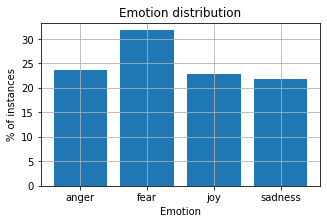

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)
# print(df1.index)
#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [13]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])
# train_data_BOW_features.toarray()

In [14]:
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [15]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [16]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [18]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [19]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [20]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/henry/opt/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 3, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country',
 'cry']

In [23]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
Tfidf_1000.fit(train_df['text'])
feature_names_1000 = Tfidf_1000.get_feature_names()
feature_names_1000[100:110]
# Tfidf_new_dataset_counts = vectorizer.fit_transform(new_dataset.sentence)

/Users/henry/opt/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['attack',
 'attacks',
 'awareness',
 'away',
 'awe',
 'awful',
 'b',
 'back',
 'bad',
 'ball']

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
# print(X_train)
# print(y_train)
# print(train_df)
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'sadness', 'fear', 'fear', 'anger', 'sadness', 'joy',
       'fear', 'fear', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [27]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.67


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.72      0.69      0.71        84
        fear       0.68      0.69      0.69       110
         joy       0.68      0.66      0.67        79
     sadness       0.61      0.65      0.63        74

    accuracy                           0.67       347
   macro avg       0.67      0.67      0.67       347
weighted avg       0.68      0.67      0.67       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[58 12  9  5]
 [13 76  6 15]
 [ 5 11 52 11]
 [ 4 12 10 48]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

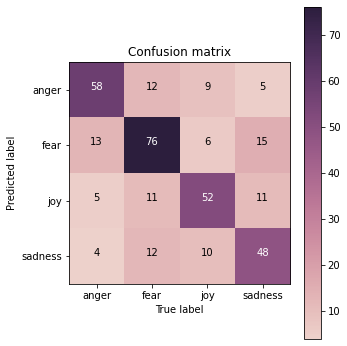

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
# print(my_tags.sort())
# print(np.arange(4))
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [32]:
# As we can see the plot above, the horizontal label is the true label and the vertical label is the predicted label.

# We could observe the first column that there are total 85 texts labeled with 'anger' in the test dataset.
# 57 of them are predicted correctly with the right label 'anger', 12 of them are mispredicted as 'fear', 
# 5 of them are mispredicted as 'joy' and 11 of them are mispredicted as 'sadness'.
# The accuracy of it(label is 'anger' and predict as 'anger' correctly) is 0.67. 

# We could observe the second column that there are total 106 texts labeled with 'fear' in the test dataset.
# 72 of them are predicted correctly with the right label 'fear', 14 of them are mispredicted as 'anger', 
# 11 of them are mispredicted as 'joy' and 9 of them are mispredicted as 'sadness'.
# The accuracy of it(label is 'fear' and predict as 'fear' correctly) is 0.68. 

# We could observe the third column that there are total 80 texts labeled with 'anger' in the test dataset.
# 55 of them are predicted correctly with the right label 'joy', 7 of them are mispredicted as 'anger', 
# 10 of them are mispredicted as 'fear' and 8 of them are mispredicted as 'sadness'.
# The accuracy of it(label is 'joy' and predict as 'joy' correctly) is 0.69. 

# We could observe the fourth column that there are total 76 texts labeled with 'anger' in the test dataset.
# 46 of them are predicted correctly with the right label 'sadness', 6 of them are mispredicted as 'anger', 
# 16 of them are mispredicted as 'fear' and 8 of them are mispredicted as 'joy'.
# The accuracy of it(label is 'anger' and predict as 'anger' correctly) is 0.61. 

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347

training accuracy for NB model: 0.79
testing accuracy for NB model: 0.69


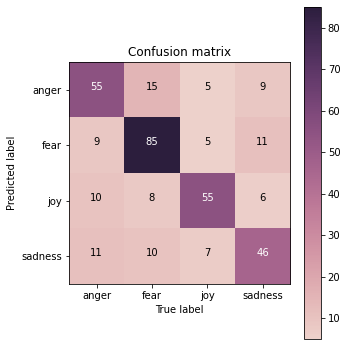

In [33]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model = NB_model.fit(X_train, y_train)
y_train_predict_NB = NB_model.predict(X_train)
y_test_predict_NB = NB_model.predict(X_test)
y_test_predict_NB[:10]
acc_train_NB = accuracy_score(y_true=y_train, y_pred=y_train_predict_NB)
acc_test_NB = accuracy_score(y_true=y_test, y_pred=y_test_predict_NB)
cm_NB = confusion_matrix(y_true=y_test, y_pred=y_test_predict_NB) 
print(classification_report(y_true=y_test, y_pred=y_test_predict_NB))
print('training accuracy for NB model: {}'.format(round(acc_train_NB, 2)))
print('testing accuracy for NB model: {}'.format(round(acc_test_NB, 2)))
plot_confusion_matrix(cm_NB, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [34]:
# The prediction for training data accuracy is better in the Decision Tree model than in the Naive Bayes model.
# The prediction for testing data accuracy is better in the Naive Bayes model than in the Decision Tree model.

# The Decision Tree model classified its data according to its data attribute. It is based on its attribute to partition its data into several parts.
# We could go through the tree from its root to its leaf to get the classification of our testing data. In this way, we could make our training data 
# accuracy almost near 1.But if our training data is not big enough, it may misrecognize some unimportant label to serve as an attribute to partition our data. 
# Therefore, its predicting results may not be so accurate.

# The Naive Bayes model is according to the Bayes' theorem to classify our data. 
# Because of its characteristic, it'll do the classification based on the conditional probability.
# It'll choose the value of C to maximize P(C|A1,A2,...,An) and decide its class. Its accuracy is not as high as the Decision Tree as it's classified its data with its probability.
# However, its accuracy for testing data will be a little higher. Its biggest limitation is that it assumed that all the attributes are conditional independence.
# While in most of the situations, it's not that case.

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

### 6.1 Prepare data (X, y)

In [35]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [36]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1816     fear
2024      joy
403     anger
2659      joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [37]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)
output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [38]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
____________________________________________

### 6.4 Train

In [39]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 0s 70us/step - loss: 1.3255 - accuracy: 0.3681 - val_loss: 1.2745 - val_accuracy: 0.4784
Epoch 2/25
3613/3613 [==============================] - 0s 33us/step - loss: 0.9875 - accuracy: 0.6482 - val_loss: 0.9198 - val_accuracy: 0.6628
Epoch 3/25
3613/3613 [==============================] - 0s 32us/step - loss: 0.5894 - accuracy: 0.7930 - val_loss: 0.7959 - val_accuracy: 0.7061
Epoch 4/25
3613/3613 [==============================] - 0s 34us/step - loss: 0.4141 - accuracy: 0.8558 - val_loss: 0.8166 - val_accuracy: 0.6686
Epoch 5/25
3613/3613 [==============================] - 0s 34us/step - loss: 0.3285 - accuracy: 0.8868 - val_loss: 0.8165 - val_accuracy: 0.6974
Epoch 6/25
3613/3613 [==============================] - 0s 33us/step - loss: 0.2663 - accuracy: 0.9106 - val_loss: 0.8922 - val_accuracy: 0.6888
Epoch 7/25
3613/3613 [==============================] - 0s 35us/step - loss: 0.220

### 6.5 Predict on testing data

In [40]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[5.5425990e-11, 1.0000000e+00, 2.1534228e-09, 1.0152394e-09],
       [3.8574281e-04, 9.9333268e-01, 4.1211379e-06, 6.2773339e-03],
       [4.3121304e-02, 1.4188512e-01, 3.4882490e-02, 7.8011107e-01],
       [1.7171374e-03, 5.9609902e-01, 4.0212899e-01, 5.4875105e-05],
       [9.9999356e-01, 4.1284043e-09, 3.3418445e-08, 6.4499286e-06]],
      dtype=float32)

In [41]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'sadness', 'fear', 'anger'], dtype=object)

In [42]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [43]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.368115,1.325528,0.478386,1.274501
1,1,0.648215,0.987507,0.662824,0.919781
2,2,0.792970,0.589361,0.706052,0.795919
3,3,0.855799,0.414112,0.668588,0.816583
4,4,0.886798,0.328451,0.697406,0.816460
5,5,0.910601,0.266268,0.688761,0.892239
6,6,0.927207,0.220024,0.694524,0.955502
7,7,0.944644,0.182080,0.668588,1.014398
8,8,0.952117,0.152552,0.680115,1.081208
9,9,0.958483,0.134263,0.680115,1.192118


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

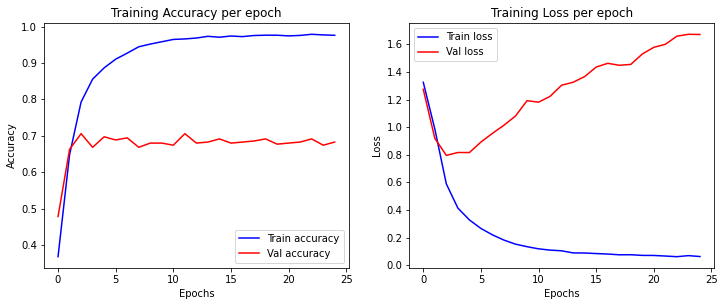

In [44]:
import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(5,5))
Epochs = training_log['epoch'].values
Accuracy = training_log['accuracy'].values
Loss = training_log['loss'].values
Val_accuracy = training_log['val_accuracy'].values
Val_loss = training_log['val_loss'].values
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (12, 4.5))

ax1.set_title('Training Accuracy per epoch')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
# ax1.grid(color = 'red', linestyle = '--', linewidth = 1)
# ax1.set_ylim(0, 200)
ax1.plot(Epochs, Accuracy, color = 'blue', label = 'Train accuracy')
ax1.plot(Epochs, Val_accuracy, color = 'red', label = 'Val accuracy')
ax1.legend()
# 設定小圖 ax2 的坐標軸標籤, 格線顏色、種類、寬度, 最後用 plot 繪圖

ax2.set_title('Training Loss per epoch')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
# ax2.grid(color = 'red', linestyle = '--', linewidth = 1)
ax2.plot(Epochs, Loss, color = 'blue', label = 'Train loss')
ax2.plot(Epochs, Val_loss, color = 'red', label = 'Val loss')
# fig.show()
ax2.legend()

In [45]:
# As we could observe above, the train accuracy and the val accuracy is gradually stable.
# The train accuracy is about 0.97(almost 1) and the val accuracy is about 0.67.
# The train loss gradually decreases to 0 and the val loss decreases first and then it turns out to be increasing.
# It is typically the result of overfitting that the analysis corresponds too closely to a specific set of data.

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [46]:
## check libra### 7.1 Prepare training corpusry
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1816,20959,Going to get myself a copy of @StephenKing's C...,"[Going, to, get, myself, a, copy, of, @, Steph..."
2024,30020,@JoshNoneYaBiz I love parody accounts! Well do...,"[@, JoshNoneYaBiz, I, love, parody, accounts, ..."
403,10403,Now that I have my ex's number now its time to...,"[Now, that, I, have, my, ex, 's, number, now, ..."
2659,30655,Well look at the bright side. You found a use ...,"[Well, look, at, the, bright, side, ., You, fo..."
2001,21144,@FraserKeegan just had a steak pie supper,"[@, FraserKeegan, just, had, a, steak, pie, su..."


In [47]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Going', 'to', 'get', 'myself', 'a', 'copy', 'of', '@', 'StephenKing', "'s", 'CUJO', 'for', 'an', 'upcoming', 'project', 'that', 'I', 'ca', "n't", 'talk', 'about', 'just', 'yet', '.', '#', 'amwriting']),
       list(['@', 'JoshNoneYaBiz', 'I', 'love', 'parody', 'accounts', '!', 'Well', 'done', '.', 'Vote', 'for', '#', 'Trump', '.', '#', 'lol', '#', 'hilarious']),
       list(['Now', 'that', 'I', 'have', 'my', 'ex', "'s", 'number', 'now', 'its', 'time', 'to', 'prank', 'him', '.', '#', 'revenge', '#', 'prank', '#', 'whatprankIshoulddo', 'seriously', 'what', 'prank', 'I', 'should', 'I', 'do'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [48]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1816,20959,Going to get myself a copy of @StephenKing's C...,"[Going, to, get, myself, a, copy, of, @, Steph..."
2024,30020,@JoshNoneYaBiz I love parody accounts! Well do...,"[@, JoshNoneYaBiz, I, love, parody, accounts, ..."
403,10403,Now that I have my ex's number now its time to...,"[Now, that, I, have, my, ex, 's, number, now, ..."
2659,30655,Well look at the bright side. You found a use ...,"[Well, look, at, the, bright, side, ., You, fo..."
2001,21144,@FraserKeegan just had a steak pie supper,"[@, FraserKeegan, just, had, a, steak, pie, su..."


In [49]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [50]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 3.59238684e-01, -3.38767886e-01,  9.98586655e-01,  2.20816627e-01,
        2.48238862e-01, -1.33572102e+00, -3.95263553e-01, -7.98494458e-01,
       -1.27012634e+00, -3.11762214e-01, -3.76777440e-01, -2.77244657e-01,
       -2.34425172e-01, -5.45225024e-01,  1.85892016e-01, -9.66305673e-01,
       -2.52330810e-01,  7.45598748e-02,  7.58165792e-02, -2.02654675e-01,
        5.15494287e-01,  7.98150122e-01,  4.97734398e-01,  7.61426836e-02,
        6.27281487e-01,  3.83229464e-01,  6.91667259e-01,  7.90550113e-02,
       -8.28596652e-01,  9.73252773e-01,  1.67145148e-01, -5.56822002e-01,
        1.91714138e-01,  2.82405615e-01,  1.43248707e-01,  2.83063829e-01,
       -7.46438861e-01, -5.25891781e-01,  5.31409562e-01,  6.15952373e-01,
       -1.88266441e-01,  8.10730278e-01, -1.01038575e+00, -5.46156645e-01,
       -4.46143225e-02, -2.87781432e-02,  4.04223830e-01,  7.39796460e-01,
        1.63196191e-01, -6.83090329e-01, -6.85311258e-01, -2.38986760e-01,
        2.18792424e-01,  

In [51]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('plz', 0.9559240937232971),
 ('-APJ', 0.9420214891433716),
 ('bday', 0.9384366273880005),
 ('pls', 0.9323086142539978),
 ('CFL', 0.9308708906173706),
 ('romance', 0.9307229518890381),
 ('Really', 0.928975522518158),
 ('help', 0.9234729409217834),
 ('November', 0.9209904670715332),
 ('chance', 0.9200400114059448)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [52]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [53]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164639472961)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [54]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# First, we could sequentially input our word vectors into the RNN model to generate sentence embedding.
# And then, classify them through dense layer.

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [55]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]
# print(word2vec_model)
# print(X)

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [56]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Imgur](pics/pic6.png)

In [57]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [58]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [59]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

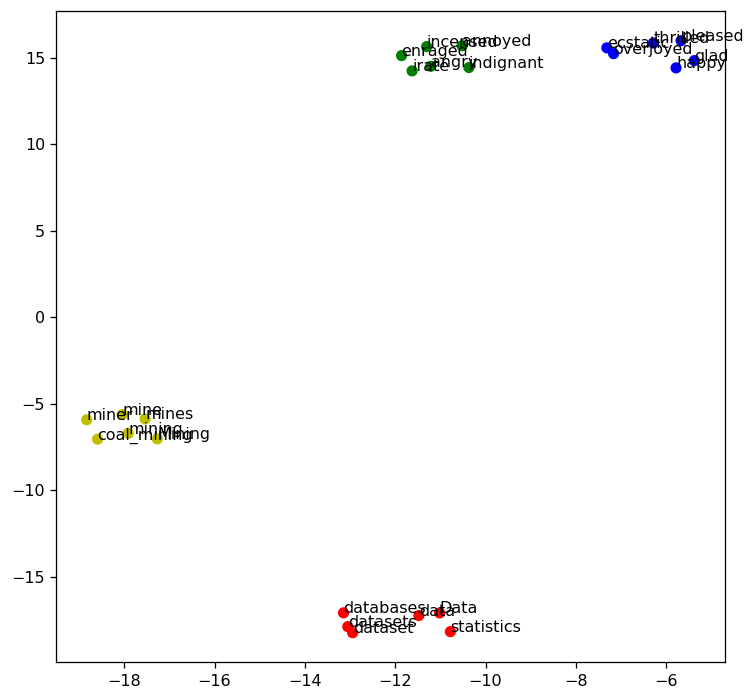

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [61]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['r'] * cn + ['g'] * cn + ['b'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

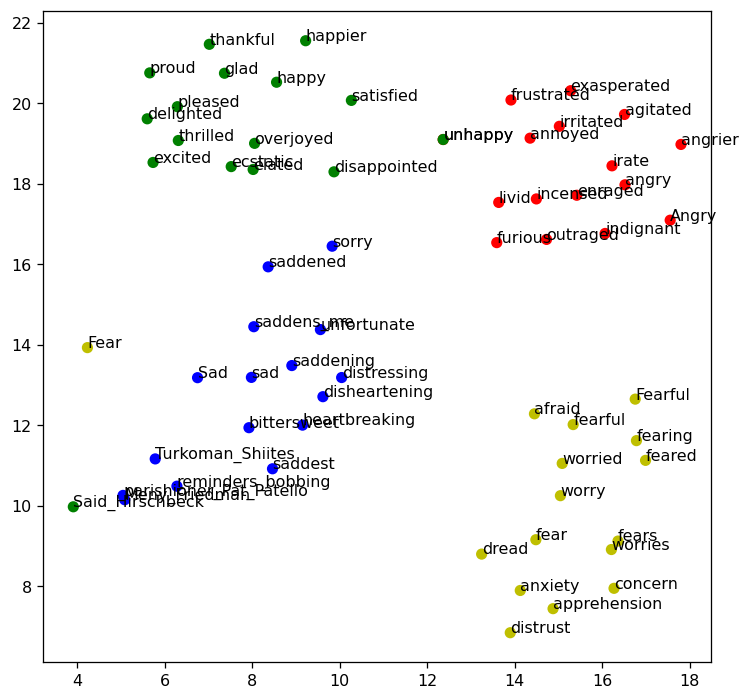

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Part2
---

![Imgur](img/pic0.png)

## Part3
---

In [63]:
import json
file = open('tweets_DM.json', 'r', encoding='utf-8')
input = []
# read our file line by line and append it into input
for line in file.readlines():
    dic = json.loads(line)
    input.append(dic)

In [64]:
dataset = pd.DataFrame()
scores = []
hashtags = []
tweet_ids = []
texts = []
# build up our dataframe
for line in input:
    scores.append(line['_score'])
    hashtags.append(line['_source']['tweet']['hashtags'])
    tweet_ids.append(line['_source']['tweet']['tweet_id'])
    texts.append(line['_source']['tweet']['text'])
dataset['score'] = scores
dataset['hashtag'] = hashtags
dataset['tweet_id'] = tweet_ids
dataset['text'] = texts
dataset

,score,hashtag,tweet_id,text
0,391,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...
1867530,827,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [65]:
read_identification = pd.read_csv('data_identification.csv')

In [66]:
# sort dataset by 'tweet_id'
dataset_sorted = dataset.sort_values(by=['tweet_id'])

In [67]:
# sort read_identification by 'tweet_id'
read_identification_sorted = read_identification.sort_values(by=['tweet_id'])

In [68]:
# write identification into dataset
identifications = []
for identification in read_identification_sorted['identification']:
    identifications.append(identification)
dataset_sorted['identification'] = identifications
dataset_sorted

,score,hashtag,tweet_id,text,identification
481452,62,[],0x1c7f0f,"@JZED74 While inappropriate AF, he likely wasn...",test
1393893,242,[BlackMirror],0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,train
1609985,915,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,train
1489386,756,[],0x1c7f12,I tried to figure out why you mean so much to ...,test
415874,213,"[auspol, fizza]",0x1c7f13,"The only “big plan” you ever had in your life,...",test
...,...,...,...,...,...
208870,77,"[WesHoolahan, WALvIRL, COYBIG]",0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,train
1270032,25,"[not, maga]",0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,train
496146,611,[],0x38fe1b,I told myself I'd be twitter famous. twitter m...,test
257653,639,[],0x38fe1c,..today was brutal ..#Hungover,train


In [69]:
# find out identification == 'train' in dataset
train_data = dataset_sorted.loc[dataset_sorted['identification'] == 'train']
train_data

,score,hashtag,tweet_id,text,identification
1393893,242,[BlackMirror],0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,train
1609985,915,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,train
3877,939,[],0x1c7f14,A nice sunny wak this morning not many <LH> ar...,train
1122275,181,"[Confession, NationalCandyCornDay, CouldEatThe...",0x1c7f15,I'm one of those people who love candy corn......,train
856108,970,[],0x1c7f16,@metmuseum What are these? They look like some...,train
...,...,...,...,...,...
988563,922,[],0x38fe18,@LJPBR @FifthHarmony Um My vote For @FifthHar...,train
208870,77,"[WesHoolahan, WALvIRL, COYBIG]",0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,train
1270032,25,"[not, maga]",0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,train
257653,639,[],0x38fe1c,..today was brutal ..#Hungover,train


In [70]:
# find out identification == 'test' in dataset
test_data = dataset_sorted.loc[dataset_sorted['identification'] == 'test']
test_data

,score,hashtag,tweet_id,text,identification
481452,62,[],0x1c7f0f,"@JZED74 While inappropriate AF, he likely wasn...",test
1489386,756,[],0x1c7f12,I tried to figure out why you mean so much to ...,test
415874,213,"[auspol, fizza]",0x1c7f13,"The only “big plan” you ever had in your life,...",test
56280,603,[],0x1c7f17,"Looking back on situations old & new, recent o...",test
906463,609,[],0x1c7f18,@jasoninthehouse Why do you insist on talking ...,test
...,...,...,...,...,...
258092,497,"[traitor, treason]",0x38fe04,"""The Grand Bargain"" The Great American Betraya...",test
1752275,187,"[FosterCare, roadtoadoption, Adoption]",0x38fe06,I get to be a 1 year old girl's new mama start...,test
867525,139,[artworld],0x38fe13,Asian dude with dangly gold earrings is back &...,test
80167,251,"[nba, cantmakeaJ]",0x38fe14,I think @kostakoufos might be the worst player...,test


In [71]:
train_data = train_data.drop(train_data.columns[4], axis = 1)
test_data = test_data.drop(test_data.columns[4], axis = 1)
test_data.to_csv('test_data.csv')

In [72]:
train_data

,score,hashtag,tweet_id,text
1393893,242,[BlackMirror],0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>
1609985,915,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...
3877,939,[],0x1c7f14,A nice sunny wak this morning not many <LH> ar...
1122275,181,"[Confession, NationalCandyCornDay, CouldEatThe...",0x1c7f15,I'm one of those people who love candy corn......
856108,970,[],0x1c7f16,@metmuseum What are these? They look like some...
...,...,...,...,...
988563,922,[],0x38fe18,@LJPBR @FifthHarmony Um My vote For @FifthHar...
208870,77,"[WesHoolahan, WALvIRL, COYBIG]",0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>
1270032,25,"[not, maga]",0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...
257653,639,[],0x38fe1c,..today was brutal ..#Hungover


In [73]:
test_data

,score,hashtag,tweet_id,text
481452,62,[],0x1c7f0f,"@JZED74 While inappropriate AF, he likely wasn..."
1489386,756,[],0x1c7f12,I tried to figure out why you mean so much to ...
415874,213,"[auspol, fizza]",0x1c7f13,"The only “big plan” you ever had in your life,..."
56280,603,[],0x1c7f17,"Looking back on situations old & new, recent o..."
906463,609,[],0x1c7f18,@jasoninthehouse Why do you insist on talking ...
...,...,...,...,...
258092,497,"[traitor, treason]",0x38fe04,"""The Grand Bargain"" The Great American Betraya..."
1752275,187,"[FosterCare, roadtoadoption, Adoption]",0x38fe06,I get to be a 1 year old girl's new mama start...
867525,139,[artworld],0x38fe13,Asian dude with dangly gold earrings is back &...
80167,251,"[nba, cantmakeaJ]",0x38fe14,I think @kostakoufos might be the worst player...


In [74]:
read_emotion = pd.read_csv('emotion.csv')
read_emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [75]:
read_emotion_sorted = read_emotion.sort_values(by=['tweet_id'])

In [76]:
read_emotion_sorted

,tweet_id,emotion
917613,0x1c7f10,joy
282085,0x1c7f11,anticipation
1383798,0x1c7f14,joy
466135,0x1c7f15,joy
737761,0x1c7f16,disgust
...,...,...
775713,0x38fe18,sadness
940737,0x38fe19,anticipation
125961,0x38fe1a,surprise
1368544,0x38fe1c,disgust


In [77]:
emotions = []
for emotion in read_emotion_sorted['emotion']:
    emotions.append(emotion)
train_data['emotion'] = emotions
train_data

,score,hashtag,tweet_id,text,emotion
1393893,242,[BlackMirror],0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,joy
1609985,915,"[twitch, Destinybeta, Destiny, Destiny2, Desti...",0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,anticipation
3877,939,[],0x1c7f14,A nice sunny wak this morning not many <LH> ar...,joy
1122275,181,"[Confession, NationalCandyCornDay, CouldEatThe...",0x1c7f15,I'm one of those people who love candy corn......,joy
856108,970,[],0x1c7f16,@metmuseum What are these? They look like some...,disgust
...,...,...,...,...,...
988563,922,[],0x38fe18,@LJPBR @FifthHarmony Um My vote For @FifthHar...,sadness
208870,77,"[WesHoolahan, WALvIRL, COYBIG]",0x38fe19,Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,anticipation
1270032,25,"[not, maga]",0x38fe1a,@mattmfm Fake news! <LH> propagated by Tumpkin...,surprise
257653,639,[],0x38fe1c,..today was brutal ..#Hungover,disgust


In [78]:
train_data.to_csv('train_data.csv')

In [103]:
import nltk

# build analyzers (bag-of-words) with max_features=10000
BOW_20000 = CountVectorizer(max_features=20000, tokenizer=nltk.word_tokenize) 
train_data_BOW_features_20000 = BOW_20000.fit_transform(train_data['text'])
train_data_BOW_features_20000.shape

(1455563, 20000)

In [104]:
X_train = train_data_BOW_features_20000
y_train = train_data['emotion']
X_test = BOW_20000.transform(test_data['text'])

# take a look at data dimension 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

X_train.shape:  (1455563, 20000)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 20000)


In [105]:
from sklearn.naive_bayes import MultinomialNB
# build up a NB model to predict the result
NB_model = MultinomialNB()
NB_model = NB_model.fit(X_train, y_train)
y_train_predict_NB = NB_model.predict(X_train)
y_test_predict_NB = NB_model.predict(X_test)

In [106]:
result = pd.DataFrame()
result['id'] = test_data['tweet_id']
result['emotion'] = y_test_predict_NB
result

,id,emotion
481452,0x1c7f0f,disgust
1489386,0x1c7f12,sadness
415874,0x1c7f13,anticipation
56280,0x1c7f17,trust
906463,0x1c7f18,disgust
...,...,...
258092,0x38fe04,sadness
1752275,0x38fe06,joy
867525,0x38fe13,disgust
80167,0x38fe14,disgust


In [107]:
# transfer result in result_NB.csv
result.to_csv("result_NB.csv",index=False)

In [125]:
from sklearn.preprocessing import LabelEncoder
y_train = train_data['emotion']
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encode(label_encoder, y_train)
y_train.shape

(1455563, 8)

In [118]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)
output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  20000
output_shape:  8


In [140]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# build up deep learning model
# input layer
model_input = Input(shape=(input_shape, ))  
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
DL_model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
DL_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
DL_model.summary()
# print(X)

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 20000)             0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                1280064   
_________________________________________________________________
re_lu_32 (ReLU)              (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
re_lu_33 (ReLU)              (None, 64)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 520       
_________________________________________________________________
softmax_14 (Softmax)         (None, 8)                 0  

In [141]:
from keras.callbacks import CSVLogger

epochs = 10
batch_size = 64

# training!
history = DL_model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    )
print('training finish')

Epoch 1/10
1455563/1455563 [==============================] - 559s 384us/step - loss: 1.2021 - accuracy: 0.5651
Epoch 2/10
1455563/1455563 [==============================] - 554s 381us/step - loss: 1.0946 - accuracy: 0.6036
Epoch 3/10
1455563/1455563 [==============================] - 544s 374us/step - loss: 1.0433 - accuracy: 0.6230
Epoch 4/10
1455563/1455563 [==============================] - 548s 377us/step - loss: 1.0040 - accuracy: 0.6379
Epoch 5/10
1455563/1455563 [==============================] - 552s 380us/step - loss: 0.9714 - accuracy: 0.6505
Epoch 6/10
1455563/1455563 [==============================] - 558s 384us/step - loss: 0.9437 - accuracy: 0.6619
Epoch 7/10
1455563/1455563 [==============================] - 553s 380us/step - loss: 0.9194 - accuracy: 0.6714
Epoch 8/10
1455563/1455563 [==============================] - 568s 390us/step - loss: 0.8976 - accuracy: 0.6802
Epoch 9/10
1455563/1455563 [==============================] - 555s 381us/step - loss: 0.8783 - accuracy:

In [145]:
# In this process, I train the model for another five times because I've found the model not so accurate.
epochs = 5
batch_size = 64

# training!
history = DL_model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    )
print('training finish')

Epoch 1/5
1455563/1455563 [==============================] - 550s 378us/step - loss: 0.8447 - accuracy: 0.7012
Epoch 2/5
1455563/1455563 [==============================] - 554s 381us/step - loss: 0.8303 - accuracy: 0.7069
Epoch 3/5
1455563/1455563 [==============================] - 540s 371us/step - loss: 0.8169 - accuracy: 0.7125
Epoch 4/5
1455563/1455563 [==============================] - 531s 364us/step - loss: 0.8049 - accuracy: 0.7169
Epoch 5/5
1455563/1455563 [==============================] - 539s 370us/step - loss: 0.7934 - accuracy: 0.7214
training finish


In [146]:
pred_result = DL_model.predict(X_test, batch_size=64)
pred_result = label_decode(label_encoder, pred_result)
pred_result

array(['sadness', 'joy', 'sadness', ..., 'joy', 'disgust', 'joy'],
      dtype=object)

In [147]:
result = pd.DataFrame()
result['id'] = test_data['tweet_id']
result['emotion'] = pred_result
result

,id,emotion
481452,0x1c7f0f,sadness
1489386,0x1c7f12,joy
415874,0x1c7f13,sadness
56280,0x1c7f17,anticipation
906463,0x1c7f18,disgust
...,...,...
258092,0x38fe04,sadness
1752275,0x38fe06,joy
867525,0x38fe13,joy
80167,0x38fe14,disgust


In [148]:
result.to_csv("result_dl14_feature10000.csv",index=False)

## Conclusion
For the first time, I select the Naive Bayes Classifier as my training moedl and then I found it not so accurate.
Therefore, for the second time, I choose the deep learning and I found it more accurate.

I have tried different batch-size and set different hidden layer for my model and I find the original model has the best result score.

During the time I train the model, I sometimes found that the more times I train the medol, the lower test score I get. I think that it was the overfitting problem and maybe I should find a way to do the better data preprocessing or try different parameters to make my model more accurate.